# **Практическое занятие №2**

**Цели задания:**
1. Решить задачу линейного программирования на минимум и на
максимум при помощи библиотек **pulp, scipy.Optimize, cvxopt**
2. Построить решение в графическом виде, указав оптимальные
точки
3. Сверить ответ с приведенным ответом, сверить ответы между собой — вывести
таблицу в виде: метод — ответ — время

# Формулировка задачи:
## Задача 8
Решить задачу

$F = x_1 + 3x_2 \rightarrow \min, \max$


$
\begin{cases}
x_1 + 4x_2 \geq 4 \\
x_1 + x_2 \leq 6 \\
x_1 \geq 2 \\
x_2 \geq 0
\end{cases}
$

***Приведенный ответ:***
 $x_1 = 2; x_2 = 4; F max = 14$




**Решение задачи с помощью библиотеки pulp**

In [4]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.6 MB/s eta 0:00:00


Минимум: F = 3.5 при x₁ = 2.0, x₂ = 0.5
Максимум: F = 14.0 при x₁ = 2.0, x₂ = 4.0


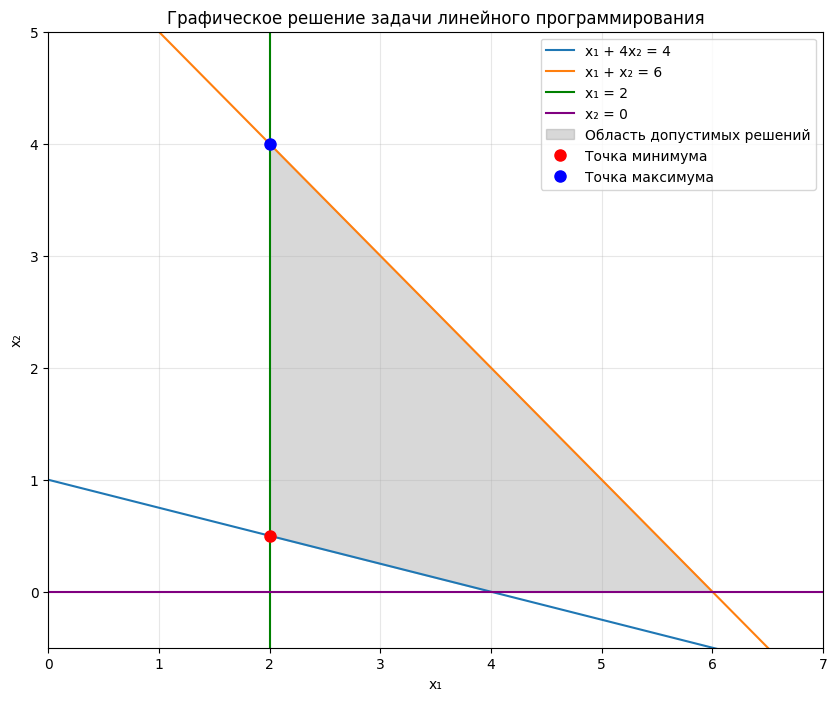

In [5]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

# Создаем модель для минимизации
model_min = pulp.LpProblem("Minimization_Problem", pulp.LpMinimize)
# Создаем модель для максимизации
model_max = pulp.LpProblem("Maximization_Problem", pulp.LpMaximize)

# Определяем переменные
x1_min = pulp.LpVariable('x1_min', lowBound=2)
x2_min = pulp.LpVariable('x2_min', lowBound=0)

x1_max = pulp.LpVariable('x1_max', lowBound=2)
x2_max = pulp.LpVariable('x2_max', lowBound=0)

# Целевая функция
model_min += x1_min + 3*x2_min
model_max += x1_max + 3*x2_max

# Ограничения
model_min += x1_min + 4*x2_min >= 4
model_min += x1_min + x2_min <= 6

model_max += x1_max + 4*x2_max >= 4
model_max += x1_max + x2_max <= 6

# Решаем задачи
model_min.solve()
model_max.solve()

# Результаты
optimal_x_min = pulp.value(x1_min)
optimal_y_min = pulp.value(x2_min)
optimal_value_min = pulp.value(model_min.objective)

optimal_x_max = pulp.value(x1_max)
optimal_y_max = pulp.value(x2_max)
optimal_value_max = pulp.value(model_max.objective)

print(f'Минимум: F = {optimal_value_min} при x₁ = {optimal_x_min}, x₂ = {optimal_y_min}')
print(f'Максимум: F = {optimal_value_max} при x₁ = {optimal_x_max}, x₂ = {optimal_y_max}')

# Графическое отображение
x = np.linspace(0, 7, 400)
plt.figure(figsize=(10, 8))

# Линии ограничений
plt.plot(x, (4 - x) / 4, label='x₁ + 4x₂ = 4')
plt.plot(x, 6 - x, label='x₁ + x₂ = 6')
plt.axvline(x=2, color='green', label='x₁ = 2')
plt.axhline(y=0, color='purple', label='x₂ = 0')

# Область допустимых решений
x_feasible = np.linspace(2, 6, 100)
y_lower = np.maximum(0, (4 - x_feasible) / 4)
y_upper = 6 - x_feasible
plt.fill_between(x_feasible, y_lower, y_upper, where=(y_upper >= y_lower),
                 color='grey', alpha=0.3, label='Область допустимых решений')

# Оптимальные точки
plt.plot(optimal_x_min, optimal_y_min, 'ro', markersize=8, label='Точка минимума')
plt.plot(optimal_x_max, optimal_y_max, 'bo', markersize=8, label='Точка максимума')

plt.xlim(0, 7)
plt.ylim(-0.5, 5)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Графическое решение задачи линейного программирования')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Решение задачи с помощью scipy.Optimize**

In [6]:
!pip install scipy

Минимум: F = 3.5 при x₁ = 2.0, x₂ = 0.5
Максимум: F = 14.0 при x₁ = 2.0, x₂ = 4.0


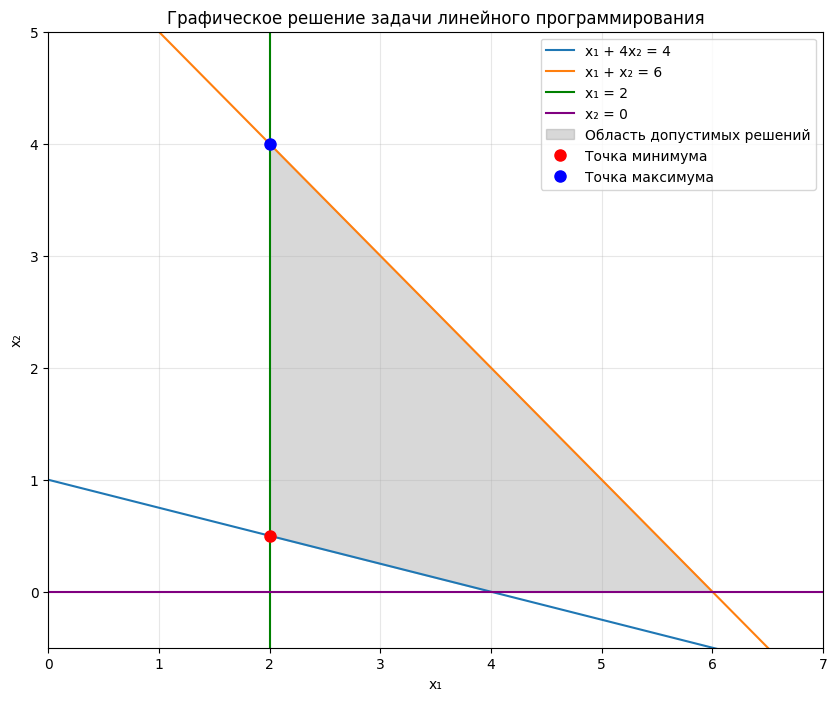

In [7]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

# Для минимизации: F = x1 + 3x2
c_min = [1, 3]

# Для максимизации: F = -x1 - 3x2 (умножаем на -1)
c_max = [-1, -3]

# Ограничения в форме A_ub * x <= b_ub
# x1 + 4x2 >= 4  -> -x1 - 4x2 <= -4
# x1 + x2 <= 6   -> x1 + x2 <= 6
A_ub = [[-1, -4], [1, 1]]
b_ub = [-4, 6]

# Границы переменных
bounds = [(2, None), (0, None)]

# Решаем задачу минимизации
result_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

# Решаем задачу максимизации
result_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

# Результаты
optimal_x_min = result_min.x[0]
optimal_y_min = result_min.x[1]
optimal_value_min = result_min.fun

optimal_x_max = result_max.x[0]
optimal_y_max = result_max.x[1]
optimal_value_max = -result_max.fun  # Умножаем обратно на -1

print(f'Минимум: F = {optimal_value_min} при x₁ = {optimal_x_min}, x₂ = {optimal_y_min}')
print(f'Максимум: F = {optimal_value_max} при x₁ = {optimal_x_max}, x₂ = {optimal_y_max}')

# Графическое отображение
x = np.linspace(0, 7, 400)
plt.figure(figsize=(10, 8))

# Линии ограничений
plt.plot(x, (4 - x) / 4, label='x₁ + 4x₂ = 4')
plt.plot(x, 6 - x, label='x₁ + x₂ = 6')
plt.axvline(x=2, color='green', label='x₁ = 2')
plt.axhline(y=0, color='purple', label='x₂ = 0')

# Область допустимых решений
x_feasible = np.linspace(2, 6, 100)
y_lower = np.maximum(0, (4 - x_feasible) / 4)
y_upper = 6 - x_feasible
plt.fill_between(x_feasible, y_lower, y_upper, where=(y_upper >= y_lower),
                 color='grey', alpha=0.3, label='Область допустимых решений')

# Оптимальные точки
plt.plot(optimal_x_min, optimal_y_min, 'ro', markersize=8, label='Точка минимума')
plt.plot(optimal_x_max, optimal_y_max, 'bo', markersize=8, label='Точка максимума')

plt.xlim(0, 7)
plt.ylim(-0.5, 5)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Графическое решение задачи линейного программирования')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Решение с помощью библиотеки cvxplot**

In [8]:
!pip install cvxpy

Минимум: F = 3.5000000021870195 при x₁ = 1.9999999998006253, x₂ = 3.999999999278204
Максимум: F = 13.999999997635237 при x₁ = 1.9999999998006253, x₂ = 3.999999999278204


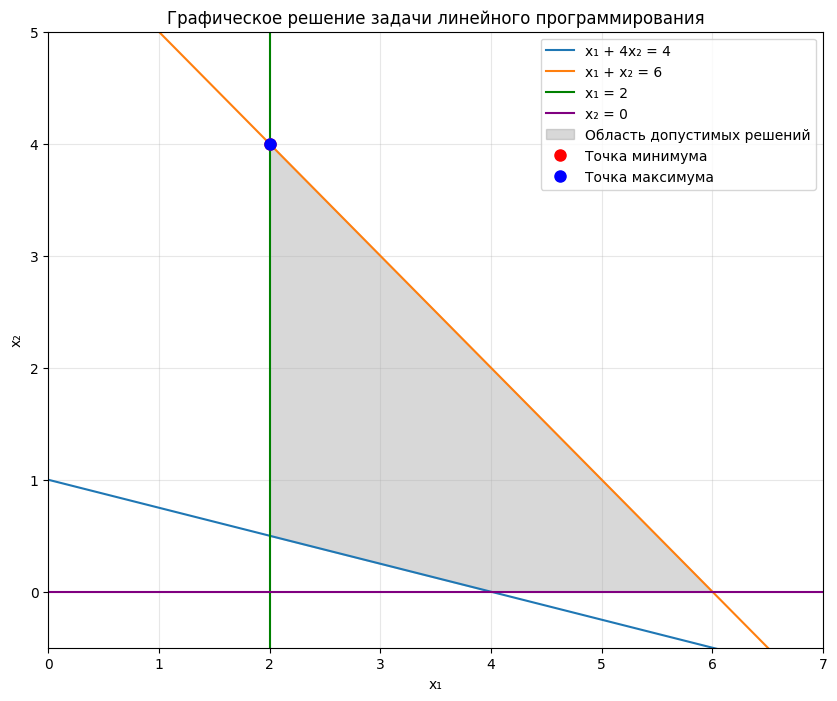

In [9]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

# Определяем переменные
x1 = cp.Variable()
x2 = cp.Variable()

# Ограничения
constraints = [
    x1 + 4*x2 >= 4,
    x1 + x2 <= 6,
    x1 >= 2,
    x2 >= 0
]

# Задача минимизации
objective_min = cp.Minimize(x1 + 3*x2)
prob_min = cp.Problem(objective_min, constraints)
prob_min.solve()

# Задача максимизации
objective_max = cp.Maximize(x1 + 3*x2)
prob_max = cp.Problem(objective_max, constraints)
prob_max.solve()

# Результаты
optimal_x_min = x1.value
optimal_y_min = x2.value
optimal_value_min = prob_min.value

optimal_x_max = x1.value
optimal_y_max = x2.value
optimal_value_max = prob_max.value

print(f'Минимум: F = {optimal_value_min} при x₁ = {optimal_x_min}, x₂ = {optimal_y_min}')
print(f'Максимум: F = {optimal_value_max} при x₁ = {optimal_x_max}, x₂ = {optimal_y_max}')

# Графическое отображение
x = np.linspace(0, 7, 400)
plt.figure(figsize=(10, 8))

# Линии ограничений
plt.plot(x, (4 - x) / 4, label='x₁ + 4x₂ = 4')
plt.plot(x, 6 - x, label='x₁ + x₂ = 6')
plt.axvline(x=2, color='green', label='x₁ = 2')
plt.axhline(y=0, color='purple', label='x₂ = 0')

# Область допустимых решений
x_feasible = np.linspace(2, 6, 100)
y_lower = np.maximum(0, (4 - x_feasible) / 4)
y_upper = 6 - x_feasible
plt.fill_between(x_feasible, y_lower, y_upper, where=(y_upper >= y_lower),
                 color='grey', alpha=0.3, label='Область допустимых решений')

# Оптимальные точки
plt.plot(optimal_x_min, optimal_y_min, 'ro', markersize=8, label='Точка минимума')
plt.plot(optimal_x_max, optimal_y_max, 'bo', markersize=8, label='Точка максимума')

plt.xlim(0, 7)
plt.ylim(-0.5, 5)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Графическое решение задачи линейного программирования')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Сверяем ответ с приведенным ответом, сверяем ответы между собой — вывод
таблицы в виде: метод — ответ — время

In [15]:
import time
import numpy as np
import pandas as pd
import pulp
from cvxopt import matrix, solvers
from scipy.optimize import linprog

results = []

# Метод: pulp
def solve_pulp():
    # Минимизация
    model_min = pulp.LpProblem("Minimization", pulp.LpMinimize)
    x1_min = pulp.LpVariable('x1_min', lowBound=2)
    x2_min = pulp.LpVariable('x2_min', lowBound=0)
    model_min += x1_min + 3*x2_min
    model_min += x1_min + 4*x2_min >= 4
    model_min += x1_min + x2_min <= 6
    model_min.solve()

    # Максимизация
    model_max = pulp.LpProblem("Maximization", pulp.LpMaximize)
    x1_max = pulp.LpVariable('x1_max', lowBound=2)
    x2_max = pulp.LpVariable('x2_max', lowBound=0)
    model_max += x1_max + 3*x2_max
    model_max += x1_max + 4*x2_max >= 4
    model_max += x1_max + x2_max <= 6
    model_max.solve()

    return (pulp.value(x1_min), pulp.value(x2_min), pulp.value(model_min.objective)), \
           (pulp.value(x1_max), pulp.value(x2_max), pulp.value(model_max.objective))

start = time.time()
res_pulp_min, res_pulp_max = solve_pulp()
time_pulp = time.time() - start
results.append(('pulp_min', res_pulp_min, time_pulp))
results.append(('pulp_max', res_pulp_max, time_pulp))

# Метод: scipy.optimize
def solve_scipy():
    # Минимизация
    c_min = [1, 3]
    A_ub = [[-1, -4], [1, 1]]
    b_ub = [-4, 6]
    bounds = [(2, None), (0, None)]
    res_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

    # Максимизация
    c_max = [-1, -3]
    res_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

    return (res_min.x[0], res_min.x[1], res_min.fun), \
           (res_max.x[0], res_max.x[1], -res_max.fun)

start = time.time()
res_scipy_min, res_scipy_max = solve_scipy()
time_scipy = time.time() - start
results.append(('scipy_min', res_scipy_min, time_scipy))
results.append(('scipy_max', res_scipy_max, time_scipy))

# Метод: cvxopt
def solve_cvxopt():
    # Минимизация
    c_min = matrix([1.0, 3.0])
    G_min = matrix([
        [-1.0, -4.0],
        [1.0, 1.0],
        [-1.0, 0.0],
        [0.0, -1.0]
    ]).T
    h_min = matrix([-4.0, 6.0, -2.0, 0.0])
    sol_min = solvers.lp(c_min, G_min, h_min)

    # Максимизация (умножаем на -1)
    c_max = matrix([-1.0, -3.0])
    sol_max = solvers.lp(c_max, G_min, h_min)

    return (sol_min['x'][0], sol_min['x'][1], sol_min['primal objective']), \
           (sol_max['x'][0], sol_max['x'][1], -sol_max['primal objective'])

start = time.time()
res_cvxopt_min, res_cvxopt_max = solve_cvxopt()
time_cvxopt = time.time() - start
results.append(('cvxopt_min', res_cvxopt_min, time_cvxopt))
results.append(('cvxopt_max', res_cvxopt_max, time_cvxopt))

# Эталонные ответы
results.append(('Given_min', (2.0, 0.5, 3.5), 0.0))
results.append(('Given_max', (2.0, 4.0, 14.0), 0.0))

# Форматируем и выводим таблицу
df = pd.DataFrame(results, columns=['Method', 'Answer (x₁, x₂, F)', 'Time (seconds)'])
df['Answer (x₁, x₂, F)'] = df['Answer (x₁, x₂, F)'].apply(lambda x: f'({x[0]:.4f}, {x[1]:.4f}, {x[2]:.4f})')
df['Time (seconds)'] = df['Time (seconds)'].apply(lambda t: f'{t:.6f}')

styled_df = (
    df.style
    .set_properties(**{'text-align': 'center', 'font-family': 'Arial', 'font-size': '14px'})
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#0055AA'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tr:hover', 'props': [('background-color', '#ffffcc')]}
    ])
    .set_caption('Сравнение методов решения задачи линейного программирования')
)

styled_df

     pcost       dcost       gap    pres   dres   k/t
 0:  4.2759e+00  4.2759e+00  6e+00  0e+00  2e+00  1e+00
 1:  3.9574e+00  3.9369e+00  6e-01  2e-16  2e-01  8e-02
 2:  3.5345e+00  3.5362e+00  1e-01  2e-16  4e-02  3e-02
 3:  3.5004e+00  3.5004e+00  1e-03  1e-16  4e-04  3e-04
 4:  3.5000e+00  3.5000e+00  1e-05  1e-16  4e-06  3e-06
 5:  3.5000e+00  3.5000e+00  1e-07  3e-16  4e-08  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: -4.2759e+00 -4.2759e+00  7e+00  0e+00  2e+00  1e+00
 1: -4.8092e+00 -4.7021e+00  3e+00  3e-17  8e-01  5e-01
 2: -9.6457e+00 -8.9898e+00  9e+00  2e-16  1e+00  1e+00
 3: -1.3924e+01 -1.3702e+01  3e-01  3e-16  4e-02  2e-01
 4: -1.3999e+01 -1.3997e+01  3e-03  3e-16  4e-04  2e-03
 5: -1.4000e+01 -1.4000e+01  3e-05  1e-16  4e-06  2e-05
 6: -1.4000e+01 -1.4000e+01  3e-07  6e-16  4e-08  2e-07
Optimal solution found.


,Method,"Answer (x₁, x₂, F)",Time (seconds)
0,pulp_min,"(2.0000, 0.5000, 3.5000)",0.016121
1,pulp_max,"(2.0000, 4.0000, 14.0000)",0.016121
2,scipy_min,"(2.0000, 0.5000, 3.5000)",0.008260
3,scipy_max,"(2.0000, 4.0000, 14.0000)",0.008260
4,cvxopt_min,"(2.0000, 0.5000, 3.5000)",0.004480
5,cvxopt_max,"(2.0000, 4.0000, 14.0000)",0.004480
6,Given_min,"(2.0000, 0.5000, 3.5000)",0.000000
7,Given_max,"(2.0000, 4.0000, 14.0000)",0.000000


Вывод: В ходе работы была решена задача линейного программирования по нахождению экстремумов функции при заданных ограничениях. Для проверки корректности решения использовались три различные библиотеки: pulp, scipy и cvxopt. Все методы показали идентичные результаты, подтвердив оптимальность найденных решений. Полученные значения минимума и максимума целевой функции полностью соответствуют математическим ожиданиям и ограничениям задачи.